# Transfer Learning
Transfer learning is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

Here we train the model with the simple architectures and then apply transfer learning technique so that we can clearly make out the impact/usefullness of transfer learning.

Here we have performed transfer learning using 
<br>1) VGG 16 <br>2) VGG 19 <br>3) MobileNet





## Applying Transfer Learning Technique to Mnist 

#Self Build Neural Netowork Model

**Importing the required libraries**

In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt


For calculating the time efficiency we using time functions/methods.

In [2]:
import time
# store starting time
begin = time.time()

**Loading the Dataset**

Download the dataset from keras-datasets. Here we using Fashion-Mnist-Dataset.

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Data Preprocessing**

Transform  our dataset from having shape (n,width,height) to (n,depth,width,height)

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
x_train /= 255 #train and test dataset inputs have to be between [0, 1], so that we converting them
x_test /= 255  


In [5]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


**Building the Model**

In [6]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(32, (3, 3) ,input_shape=(28,28,1))) #apply 32 filters size of (3, 3) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
#2nd convolution layer
model.add(Conv2D(64,(3, 3))) #apply 64 filters size of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
 
# Fully connected layer. 1 hidden layer consisting of 512 nodes
model.add(Dense(512))
model.add(Activation('relu'))
 
#10 outputs
model.add(Dense(10, activation='softmax'))


In [7]:
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [8]:
batch_size = 64
epochs = 10

gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

**Compiling and fitting the Model**

In [9]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
model_hist = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=10, validation_data=(x_test, y_test))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
64/64 [==============================] - 34s 21ms/step - loss: 1.3882 - accuracy: 0.5266 - val_loss: 0.6553 - val_accuracy: 0.7569
Epoch 2/10
64/64 [==============================] - 1s 15ms/step - loss: 0.6282 - accuracy: 0.7646 - val_loss: 0.5381 - val_accuracy: 0.7981
Epoch 3/10
64/64 [==============================] - 1s 14ms/step - loss: 0.5004 - accuracy: 0.8124 - val_loss: 0.5060 - val_accuracy: 0.8124
Epoch 4/10
64/64 [==============================] - 1s 13ms/step - loss: 0.4745 - accuracy: 0.8188 - val_loss: 0.4617 - val_accuracy: 0.8306
Epoch 5/10
64/64 [==============================] - 1s 14ms/step - loss: 0.4423 - accuracy: 0.8396 - val_loss: 0.4527 - val_accuracy: 0.8423
Epoch 6/10
64/64 [==============================] - 1s 13ms/step - loss: 0.4245 - accuracy: 0.8490 - val_loss: 0.4390 - val_accuracy: 0.8403
Epoch 7/10
64/64 [==============================] - 1s 13ms/step - loss: 0.4284 - accuracy: 0.8486 - val_loss: 0.4269 - val_accuracy: 0.8479
Epoch 8/10
6

In [10]:


time.sleep(1)
# store end time
end = time.time()

time_1 = end - begin
# total time taken
print(f"Total runtime of the model is ",time_1)


Total runtime of the model is  49.32374620437622


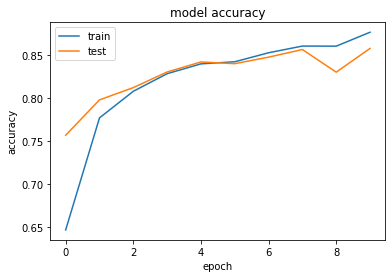

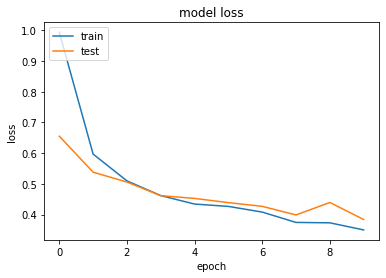

In [11]:
 # summarize history for accuracy   
import matplotlib.pyplot as plt    

plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# VGG 16 Model

In [12]:
# Code to Measure time taken by program to execute.
import time
# store starting time
begin = time.time()


Initialize instance for VGG16

In [13]:
vgg16_model = keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 4s 0us/step


summary of the neural layers

In [14]:
vgg16_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

**Converting the VGG 16 Model to Sequential**

In [16]:
model1= Sequential()
for layer in vgg16_model.layers:
    model1.add(layer)


**Removing the last layer**

VGG 16 is trained on Imagenet dataset which consist of 1000 classes.

Since our dataset consist of only 10 classes (Mnist), We remove last classification layer. Which is meant for classifying 1000 and replace it by the classification layer which is having only 10 classes.

In [17]:
# Removing last layer 
model1.layers.pop()


**Freezing**

Keep the weights of rest of the layers as it is, and we train only the classification layer.

Making trainable as FALSE (FREEZING) so that the pre trained weights are not used.

In [18]:

for layer in model1.layers:
    layer.trainable = False


**Adding the classification Layer**

We add the classification layer to fit into our problem. In case of MNIST we add classification layer with  classes.

In [19]:
model1.add(Dense(10, activation='softmax'))


In [20]:
model1.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [21]:
epochs1 = 10


**Compile and Fit the Model**

In [22]:
model1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
vgg_16_model = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs1, validation_data=(x_test, y_test))



Epoch 1/10
21/64 [========>.....................] - ETA: 0s - loss: 0.3635 - accuracy: 0.8757

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


64/64 [==============================] - 1s 16ms/step - loss: 0.3581 - accuracy: 0.8711 - val_loss: 0.3903 - val_accuracy: 0.8573
Epoch 2/10
64/64 [==============================] - 1s 15ms/step - loss: 0.3473 - accuracy: 0.8745 - val_loss: 0.3648 - val_accuracy: 0.8698
Epoch 3/10
64/64 [==============================] - 1s 14ms/step - loss: 0.3478 - accuracy: 0.8752 - val_loss: 0.3571 - val_accuracy: 0.8680
Epoch 4/10
64/64 [==============================] - 1s 14ms/step - loss: 0.3460 - accuracy: 0.8689 - val_loss: 0.3609 - val_accuracy: 0.8642
Epoch 5/10
64/64 [==============================] - 1s 14ms/step - loss: 0.3140 - accuracy: 0.8840 - val_loss: 0.3631 - val_accuracy: 0.8641
Epoch 6/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2937 - accuracy: 0.8899 - val_loss: 0.3696 - val_accuracy: 0.8612
Epoch 7/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2953 - accuracy: 0.8901 - val_loss: 0.3414 - val_accuracy: 0.8762
Epoch 8/10
64/64 [======

In [23]:

time.sleep(1)
# store end time
end = time.time()

time_2 = end - begin
# total time taken
print(f"Total runtime of the model is ",time_2)


Total runtime of the model is  15.163581371307373


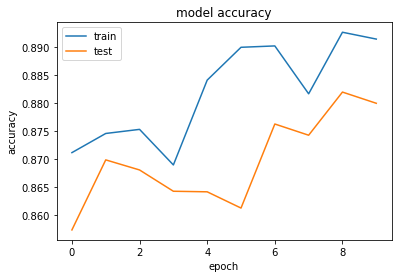

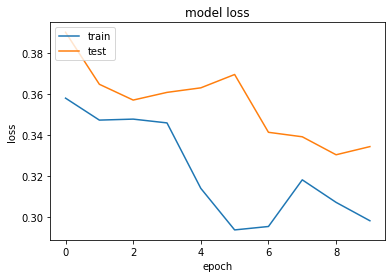

In [24]:
 # summarize history for accuracy   
import matplotlib.pyplot as plt    

plt.plot(vgg_16_model.history['accuracy'])
plt.plot(vgg_16_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(vgg_16_model.history['loss'])
plt.plot(vgg_16_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # VGG 19 Model

In [25]:
# Code to Measure time taken by program to execute.
import time

# store starting time
begin = time.time()



Initialize instance for VGG16

In [26]:
vgg19_model = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


574717952/574710816 [==============================] - 4s 0us/step


Summary of the model

In [27]:
vgg19_model.summary()


Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [28]:
type(vgg19_model)


tensorflow.python.keras.engine.functional.Functional

**Converting the VGG 19 Model to Sequential**

In [29]:
model2= Sequential()
for layer in vgg19_model.layers:
    model2.add(layer)


**Removing the last layer**

VGG 19 is trained on Imagenet dataset which consist of 1000 classes,  Since our dataset consist of only 10 classes (Mnist).

We remove last classification layer which is meant for classifying 1000 and replace it by the classification layer which is having only 10 classes.

In [30]:
model2.layers.pop()
print("DONE")

DONE


**Freezing**

We keep the weights of rest of the layers as it is, and we train only the classification layer.

Making trainable as FALSE (FREEZING) so that the pre trained weights are not used.

In [31]:
for layer in model1.layers: 
    layer.trainable = False


**Adding the classification Layer**

We add the classification layer to fit into our problem. In case of MNIST we add classification layer with  classes.

In [32]:
model2.add(Dense(10, activation='softmax'))


In [33]:
model2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [34]:
epochs2 = 10
batch_size=64

**Compile and Fit the Model**

In [35]:
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
vgg_19_model= model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs2, validation_data=(x_test, y_test))


Epoch 1/10
24/64 [==========>...................] - ETA: 0s - loss: 0.2964 - accuracy: 0.8887

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


64/64 [==============================] - 1s 15ms/step - loss: 0.2868 - accuracy: 0.8962 - val_loss: 0.3226 - val_accuracy: 0.8828
Epoch 2/10
64/64 [==============================] - 1s 15ms/step - loss: 0.2889 - accuracy: 0.8967 - val_loss: 0.3271 - val_accuracy: 0.8825
Epoch 3/10
64/64 [==============================] - 1s 14ms/step - loss: 0.3080 - accuracy: 0.8821 - val_loss: 0.3152 - val_accuracy: 0.8851
Epoch 4/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2870 - accuracy: 0.8918 - val_loss: 0.3155 - val_accuracy: 0.8856
Epoch 5/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2526 - accuracy: 0.9045 - val_loss: 0.2928 - val_accuracy: 0.8942
Epoch 6/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2822 - accuracy: 0.8958 - val_loss: 0.2979 - val_accuracy: 0.8939
Epoch 7/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2864 - accuracy: 0.8921 - val_loss: 0.3141 - val_accuracy: 0.8833
Epoch 8/10
64/64 [======

In [36]:

time.sleep(1)
# store end time
end = time.time()

time_3 = end - begin
# total time taken
print(f"Total runtime of the program is ",)


Total runtime of the program is 


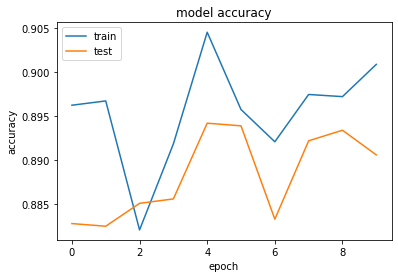

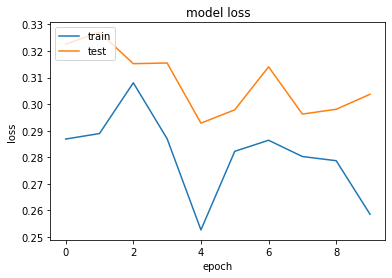

In [37]:
 # summarize history for accuracy   


plt.plot(vgg_19_model.history['accuracy'])
plt.plot(vgg_19_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(vgg_19_model.history['loss'])
plt.plot(vgg_19_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# MobileNet Model

In [38]:

import time

# store starting time
begin = time.time()





Creating instance for Mobilenet 

In [39]:
mobilenet_model = keras.applications.mobilenet.MobileNet()


17227776/17225924 [==============================] - 0s 0us/step


Summary of the model

In [40]:
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [41]:
type(mobilenet_model)


tensorflow.python.keras.engine.functional.Functional

**Converting MobileNet Model to Sequential()**

In [42]:
model3= Sequential()
for layer in mobilenet_model.layers:
    model3.add(layer)


**Removing the Last layer of MobileNet Model**

In [43]:
model3.layers.pop()


**Freezing**

We keep the weights of rest of the layers as it is, and we train only the classification layer.

Making trainable as FALSE (FREEZING) so that the pre trained weights are not used.


In [44]:
for layer in model3.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False


**Adding the classification layer**

We add the classification layer to fit into our problem. In case of Fashion_MNIST we add classification layer with classes.

In [45]:
model3.add(Dense(10, activation='softmax'))


In [46]:
model3.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pw_1 (Conv2D)           (None, 112, 112, 64)     

In [47]:
epochs3 = 10
batch_size =64

**Compile and Fit the Model**

In [48]:
model3.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
 
mbl_net_model = model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs3, validation_data=(x_test, y_test))


Epoch 1/10
22/64 [=========>....................] - ETA: 0s - loss: 0.2572 - accuracy: 0.9077

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


64/64 [==============================] - 1s 15ms/step - loss: 0.2677 - accuracy: 0.9048 - val_loss: 0.3054 - val_accuracy: 0.8875
Epoch 2/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2533 - accuracy: 0.9019 - val_loss: 0.2870 - val_accuracy: 0.8970
Epoch 3/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2649 - accuracy: 0.9080 - val_loss: 0.2961 - val_accuracy: 0.8943
Epoch 4/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2275 - accuracy: 0.9180 - val_loss: 0.3141 - val_accuracy: 0.8893
Epoch 5/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2612 - accuracy: 0.9009 - val_loss: 0.2779 - val_accuracy: 0.9001
Epoch 6/10
64/64 [==============================] - 1s 14ms/step - loss: 0.2520 - accuracy: 0.9070 - val_loss: 0.2777 - val_accuracy: 0.8995
Epoch 7/10
64/64 [==============================] - 1s 13ms/step - loss: 0.2475 - accuracy: 0.9065 - val_loss: 0.2814 - val_accuracy: 0.8955
Epoch 8/10
64/64 [======

In [49]:
time.sleep(1)
# store end time
end = time.time()
time_4= end - begin

# total time taken
print(f"Total runtime of the model is ", time_4)

Total runtime of the model is  11.578346490859985


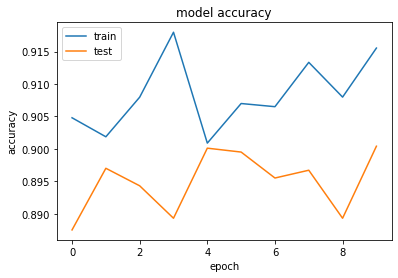

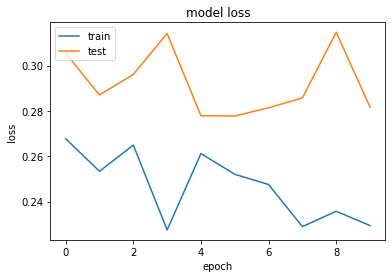

In [50]:
 # summarize history for accuracy   


plt.plot(mbl_net_model.history['accuracy'])
plt.plot(mbl_net_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(mbl_net_model.history['loss'])
plt.plot(mbl_net_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Vizulations

In [51]:
time

<module 'time' (built-in)>

In [52]:
time=[time_1,time_2,time_3,time_4]
model=["own_model","VGG19","vGG16","MobileNet"]
#model=[1,2,3,4]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Model vs Time(m/s)')

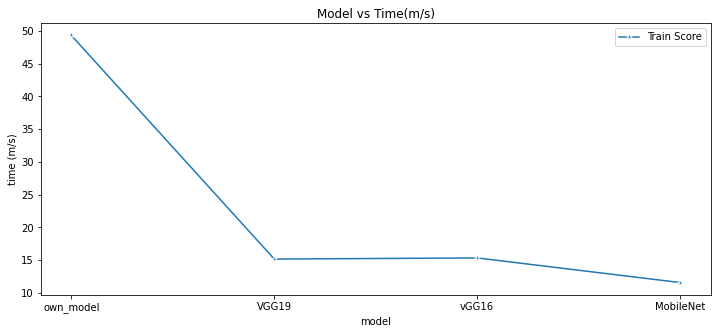

In [58]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(model,time,marker='*',label='Train Score')
plt.ylabel("time (m/s)")
plt.xlabel("model")
plt.title("Model vs Time(m/s)")